## Capstone Project - The Battle of the Neighborhoods 
### Girlfriend's new apartment

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The pandemic has caused several changes to our society. One of the effects in the city of São Paulo was a sharp increase in the demand for rental properties. During the third trimester of 2020, there was an 18% increase in the number of searches in a popular real state website compared to the same period in 2019. The number of officialized real state transactions was 336.968, a 37% increase compared to 10 years prior. 
One of the many people that moved during that period is my girlfriend. The sudden change to remote work and of her daily habits, along with a loss of income in her family influenced her choice of moving back to her parent household. However, now that the pandemic is (hopefully) nearing its end and the prospect of her job requiring her to return to her office, she is looking for a new place to live.

In this project, we intend to use the skills acquired in data scrapping, data wrangling, and machine learning to aid us in the search for a new apartment. 

## Data <a name="data"></a>

In this project, we will use data from three different sources. 

* The first and most import data comes from a popular real state website called "Quinto Andar". From this website, we obtain data on real state location, characteristics (number of bedrooms, parking space, etc), and total price. 
* From Google we will obtain the information of the transit time required from each of the apartments to her workplace.
* From Foursquare we obtain data of the venues surrounding each of the apartments. 


### Quinto andar API
To obtain the real state information, we access Quinto Andar's api and perform enquiries.
For our first inquiry we search for real state in a square area with the two of the edges diagonal to each other located in the following coordinates: (-23.478476683596345,-46.76044092347318)(-23.692276596008664,-46.59753427723765).
This square covers most of the city of São Paulo. 

We also filter for real state with the following characteristics. 
* Total rental price (Rent + condominium fee + taxes) larger than 1000,00 BRL and lower than 2800,00 BRL
* Total number of bedrooms larger than 2
* Parking slots larger than 1
* Close to train or metro stations
* Accept pets
* Currently available

These were characteristics chosen by the client (i.e The girlfriend.)

In [5]:
import requests
import math
import numpy as np
import pandas as pd
from project_lib import Project

In [7]:
ini=0
url="https://www.quintoandar.com.br/api/search?q=(and%20vagas:%271%27(and%20area:[20,1000](and%20custo:[1000,2800]tipo:%27Apartamento%27)))&fq=local:[%27-23.478476683596345,-46.76044092347318%27,%27%20-23.692276596008664,-46.59753427723765%27]&return=id&size=12&q.parser=structured&expr.distance=floor(haversin(-23.585376639802504,-46.678987600355413,local.latitude,local.longitude))&expr.rank=relevance_score-(10000*distance)&sort=rank%20desc&start={}".format(ini)
data = requests.get(url).json()

In [8]:
ids=[]
total_finds=data["hits"]["found"];
for searches in range(0,math.ceil(total_finds/12)):
    ini=searches*12
    url="https://www.quintoandar.com.br/api/search?q=(and%20vagas:%271%27(and%20area:[20,1000](and%20custo:[1500,2800]tipo:%27Apartamento%27)))&fq=local:[%27-23.478476683596345,-46.76044092347318%27,%27%20-23.692276596008664,-46.59753427723765%27]&return=id&size=12&q.parser=structured&expr.distance=floor(haversin(-23.585376639802504,-46.678987600355413,local.latitude,local.longitude))&expr.rank=relevance_score-(10000*distance)&sort=rank%20desc&start={}".format(ini)
    data = requests.get(url).json()
    for hit in range(0, len(data["hits"]["hit"])):
        ids.append(data["hits"]["hit"][hit]["id"])
        

In [214]:
print("The number of apartments obtained in the squared area that covers most of São Paulo is {}.".format(len(ids)))

The number of apartments obtained in the squared area that covers most of São Paulo is 4317


In [9]:
url="https://www.quintoandar.com.br/property/{}?variant=0&showPartnerId=true".format(ids[0])
data = requests.get(url).json()

In [10]:
Apts=pd.DataFrame(columns=["Code","Website_Id","Lat","Lng","Bedrooms","Parking_Slots","Total_Value","Total_Area", "Floor","Neighborhood","Status"])
for id in range(0,len(ids)):
    url="https://www.quintoandar.com.br/property/{}?variant=0&showPartnerId=true".format(ids[id])
    try:
        data = requests.get(url).json()
        filters= (data["bedrooms"]>=2 and data['parkingSlots']>=1 and
                 data["rentValue"]+ data["condominiumValue"]+data["iptuValue"]<=2800 and
                 data["forRent"]==True and data["status"]!="despublicado" and data["acceptPets"]==True
                 and data["nearSubway"]==True)
        if filters==1:
            Apts=Apts.append({"Code": data["code"],"Website_Id":data["displayCode"],"Lat":data["lat"],"Lng":data["lng"],"Bedrooms":data["bedrooms"],"Parking_Slots":data["parkingSlots"],"Total_Value":data["rentValue"]+ data["condominiumValue"]+data["iptuValue"],"Total_Area":data["totalArea"], "Floor":data["floor"],"Neighborhood":data["neighborhood"],"Status":data["status"]},ignore_index=True)
    except:
        print("Filter error during code {} analysis".format(ids[id]))
          

        

Filter error during code 893230972 analysis
Filter error during code 893101236 analysis
Filter error during code 892851186 analysis
Filter error during code 893286866 analysis
Filter error during code 892803020 analysis
Filter error during code 893280263 analysis
Filter error during code 892788261 analysis
Filter error during code 892788408 analysis
Filter error during code 893360339 analysis
Filter error during code 893057516 analysis
Filter error during code 893009006 analysis
Filter error during code 893157189 analysis
Filter error during code 892795085 analysis
Filter error during code 892850206 analysis
Filter error during code 892898315 analysis
Filter error during code 893272210 analysis
Filter error during code 893114429 analysis
Filter error during code 893349905 analysis
Filter error during code 893058239 analysis


The error code presented represents real state codes that, upon enquiry, return empty data. Therefore, they are discarded.

In [216]:
Available_Apts=Apts[Apts["Status"]=="publicado"]
Ids=Available_Apts.shape
print("The number of apartments that attain the requirements in our data description is {}.".format(Ids[0]))

The number of apartments that attain the requirements in our data description is 281.


#### Saving the stored data

In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
#Saving Apt dataframe
pc = project.project_context
project.save_data(data=Apts.to_csv(index=False),file_name='Apt2.csv',overwrite=True)

{'file_name': 'Apt2.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'girlfriendnewhome-donotdelete-pr-xjhotsow9ciboj',
 'asset_id': '525c555c-4e81-4518-82f4-7179bbfeea33'}

In [ ]:
# The code was removed by Watson Studio for sharing.

### Folium
We now present the real state location on a map using the Folium Library

In [16]:
# Collecting the coordinates of Girfriend's work
from geopy.geocoders import Nominatim
! pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 16.5 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=ffec90d3d109f2d43982080735a9c6bcd4b7460fe8714451f1c497b10552c278
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


In [17]:
# The code was removed by Watson Studio for sharing.

In [19]:
#Building map of the filtered apartments and her (approximate) work location.
map_sp = folium.Map(location=[work_lat, work_long], zoom_start=12)
for lat, lng, label in zip(Available_Apts['Lat'], Available_Apts['Lng'], Available_Apts['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp) 
    
label = folium.Popup("work", parse_html=True)
folium.CircleMarker(
        [work_lat, work_long],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#e43609',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)  
map_sp

The red circle presents an approximate position of here workplace. 
As can be seen, there are few options close to her workplace. Therefore in our next analysis we will take transit time into consideration.


### Google Maps
Using Google Maps API we calculate the transit time from each of the apartments to here workplace using public transit.
It is considered the transit time to arrive at her workplace at 9 am of the next monday.

In [20]:
# The code was removed by Watson Studio for sharing.

In [21]:
#Function that calculates the time of arrival (Next monday at 9 am in Sao Paulo). 
#I has to be specified as an integer in seconds since midnight, January 1, 1970 UTC.
from datetime import datetime, timedelta,date
from pytz import timezone
import pytz
def arrival_time(weekday,datetime_sp):
    if weekday==0:
        if datetime_sp.hour>=9 and datetime_sp.minute>=0 and datetime_sp.second>=0:
            next_monday=datetime_sp+timedelta(days=7);
        else:
            next_monday=datetime_sp
    else:
        delta=7-weekday
        next_monday=datetime_sp+timedelta(days=delta);
        
    next_monday=next_monday.replace(hour=12, minute=0, second=0, tzinfo=timezone('UTC'))
    date_base=date(1970,1,1)
    nmonday_date=date(next_monday.year,next_monday.month,next_monday.day)
    delta_day=nmonday_date-date_base
    nmonday_seconds=delta_day.days*24*60*60+next_monday.hour*60*60+next_monday.second
    return nmonday_seconds

In [22]:
#Calculate the arrival time to be used 
tz_sp = pytz.timezone('America/Sao_Paulo') 
datetime_sp = datetime.now(tz_sp)
weekday_sp=datetime_sp.today().weekday()
next_monday_arrival=arrival_time(weekday_sp,datetime_sp)


In [23]:
import requests
import re

In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
arrival_time=next_monday_arrival
minutes=[];
for row in Available_Apts.iterrows():
    origins=str(row[1]["Lat"])+","+str(row[1]["Lng"])
    url="https://maps.googleapis.com/maps/api/distancematrix/json?units=standard&origins={}&destinations={}&key={}&mode=transit&arrival_time={}".format(origins,destinations, key, arrival_time)
    data=requests.get(url).json()
    try:
        traffic_time=data["rows"][0]['elements'][0]['duration']["text"]
        temp = re.findall(r'\d+', traffic_time)
        res = list(map(int, temp))
        if len(res)>1:
            temp=res[0]*60+res[1]
            minutes.append(temp)
        else:
            temp=res[0]; 
            minutes.append(temp); 
    except:
        minutes.append('n/a');
Available_Apts['Traffic_time(min)']=minutes
    

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
#Dropping redundancies
Apts_near=Available_Apts.drop_duplicates(subset = ["Website_Id"])

### Foursquare

#### Obtaining the data of the venues surrounding each apartment

In [124]:
# The code was removed by Watson Studio for sharing.

In [125]:
#Retrieving neighborhood name, category and geo position of the venues
All_venues=pd.DataFrame(columns=['Website_Id','name','categories','lat','lng']);
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
for row in Apts_near.iterrows():
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    row[1]['Lat'], 
    row[1]['Lng'], 
    radius, 
    LIMIT)
    results = requests.get(url).json()
    items=results['response']['groups'][0]['items']
    if items!=[]:
        venues=pd.json_normalize(items)
        venues_filt=venues[filtered_columns]
        for row2 in venues_filt.iterrows():
            venues_filt['venue.categories'][row2[0]]=venues_filt['venue.categories'][row2[0]][0]['name']
        venues_filt.columns = [col.split(".")[-1] for col in venues_filt.columns]
        venues_filt['Website_Id']=row[1]['Website_Id']
        All_venues=pd.concat([All_venues,venues_filt])
All_venues.reset_index(inplace=True) 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

### Adding test locations

These are locations that the client has lived before and liked. They will be used to choose one the group after clustering.

In [126]:
# The code was removed by Watson Studio for sharing.

In [127]:
for index in range(0,2):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Lat_GF[index], 
    Lng_GF[index], 
    radius, 
    LIMIT)
    results = requests.get(url).json()
    items=results['response']['groups'][0]['items']
    if items!=[]:
        venues=pd.json_normalize(items)
        venues_filt=venues[filtered_columns]
        for row2 in venues_filt.iterrows():
            venues_filt['venue.categories'][row2[0]]=venues_filt['venue.categories'][row2[0]][0]['name']
        venues_filt.columns = [col.split(".")[-1] for col in venues_filt.columns]
        venues_filt['Website_Id']='GF{}'.format(index)
        All_venues=pd.concat([All_venues,venues_filt])

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Methodology <a name="methodology"></a>

In this project we intend to evaluate apartments in São Paulo according to several characterstics. 
The goal is to have a short list of 5 to 20 apartments that would fit to our client's needs.
It is important that we do not filter excessively, leading to a small number of choices. There are important properties of the apartment that cannot be easily evaluated through the use of algorithms, such as personal taste. 
We also cannot be too loose on our filtering, leading to too many choices the client would have to go through manually.

The first step of the process has already being performed when the data was obtained, by filtering considering several characteristics of the apartment. 

The second step consists of finding apartments in locations that are similar to places the client has lived before and approved (we will call them test locations). 
This is done by a K-means clustering algorithm. In this clustering algorithm we feed information concerning venues the are closed to each of the apartments. The frequency of each kind of venue is used as a feature in the clustering algorithm, which separate the apartments into mutually exclusive groups. We then choose the group that contain the test locations. Although the problem could be modelled as a classification problem,  due to the small number of test locations we decided to use clustering instead.

The final step is filtering the apartments in which the transit time to the client's workplace is acceptable (60 minutes).



#### Category frequency
We first build our input dataframe to our K_means algorithm. We do this by transforming the categorical variables (categories) into binary variables by using the get_dummies command. 
Then the frequency of each category of venue is calculated.

In [128]:
category_bin=pd.get_dummies(All_venues['categories'])
category_bin['Website_Id']=All_venues['Website_Id']
category_bin=category_bin[['Website_Id'] + list(category_bin.columns[:-1])]
frequency_neigh=category_bin.groupby('Website_Id').mean()

We also build a dataframe containing the top5 most frequent venue categories for each apartment. 

In [129]:
#top 5 most frequent venue categories per neighborhood
top5=pd.DataFrame(columns=['Website_Id', '1', '2', '3', '4', '5'])
for row in frequency_neigh.iterrows():
    List=row[1].sort_values(ascending=False)
    try:
        top5=top5.append({'Website_Id':row[0], '1':List.index[1], '2':List.index[2],'3':List.index[3],'4':List.index[4],'5':List.index[5]}, ignore_index=True)
    except:
        pass
top5.head()


,Website_Id,1,2,3,4,5
0,101409,Fruit & Vegetable Store,Gym / Fitness Center,Pizza Place,Burger Joint,Bar
1,116535,Bakery,Pharmacy,Brazilian Restaurant,Pizza Place,Gym / Fitness Center
2,119491,Bakery,Gym / Fitness Center,Pharmacy,Restaurant,BBQ Joint
3,136640,Shopping Mall,Dessert Shop,Chocolate Shop,Bakery,Gym
4,161542,Bakery,Supermarket,Snack Place,Farmers Market,Plaza


### K-means Clustering

In [132]:
# K-means Clustering!

from sklearn.cluster import KMeans
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

Our first attempt to determine the number of clusters is to analyse the Mean squared distance between the clusters centroids to the elements in its own group for different number of clusters. Called the "elbow method" the inflection point is chosen as the number of clusters

In [133]:
#Selecting the number of clusters of the Kmeans by analysing the mean distance between the elements of a cluster and its centroid
temp=[];
temp2=[];
for ncluster in range(2,20):
    try:
        frequency_neigh=frequency_neigh.drop('labels',1)
    except:
        pass
    kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(frequency_neigh)
    frequency_neigh['labels']=kmeans.labels_
    for row in frequency_neigh.iterrows():
        temp.append((sum((kmeans.cluster_centers_[int(row[1]['labels'])]- row[1][:-1])**2)))
    temp2.append(sum(temp)/len(temp))

Text(0, 0.5, 'Mean squared error')

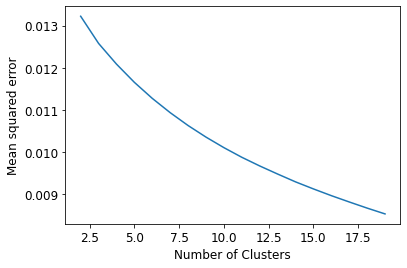

In [134]:
plt.plot(range(2,20),temp2)
plt.xlabel('Number of Clusters')
plt.ylabel('Mean squared error')

However, is possible to observe that the curve does not have a clear inflection point. Therefore we attemp a different method to determine the number of clusters. 

Based on the client's preferences, we know that the two test locations should be on the same group.

We also want the clustering to be selective, as the number of apartments at this point is still high. Therfore, after iterating on the number of clusters, we chose the highest number of clusters that still abided by the rule stated above. 

In [198]:
ncluster=7
cluster_df=frequency_neigh.drop('labels',1)
kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(cluster_df)
frequency_neigh['labels']=kmeans.labels_

In [199]:
print("Teste Location 1 is in cluster {}". format(frequency_neigh['labels']["GF0"]))
print("Teste Location 2 is in cluster {}". format(frequency_neigh['labels']["GF1"]))

Teste Location 1 is in cluster 3
Teste Location 2 is in cluster 3


#### Map of the apartments. Each color represents one of the groups.

In [201]:
# set color scheme for the clusters
x = np.arange(ncluster)
ys = [i + x + (i*x)**2 for i in range(ncluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_sp = folium.Map(location=[work_lat, work_long], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Apts_near['Lat'], Apts_near['Lng'], Apts_near['Website_Id'],frequency_neigh['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str( cluster ), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_sp)
       
map_sp

#### Checking the number of apartments in each group. And especially, group 3 which is the group of the test locations

In [202]:
frequency_neigh.groupby('labels').count()

,Acai House,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
labels,,,,,,,,,,,,,,,,,,,,,
0,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
1,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
2,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
3,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
4,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
5,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
6,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


Lets analyse first information on Transit Time

The transit time median is 64.5 minutes.


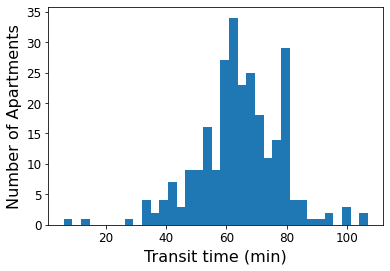

In [237]:
import statistics as st
a=plt.hist(Apts_near['Traffic_time(min)'],35)
plt.xlabel('Transit time (min)',fontdict={'fontsize':16})
plt.ylabel('Number of Apartments',fontdict={'fontsize':16})
med=st.median(Apts_near['Traffic_time(min)'])
print("The transit time median is {} minutes.".format(med))


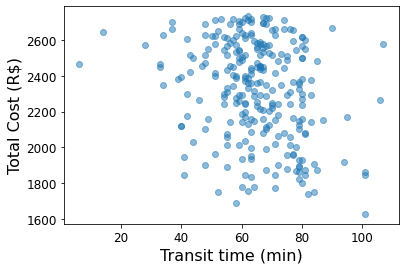

R square is 0.06804674150324908


In [241]:
#Scatter plot of the transit time. 
plt.scatter(Apts_near['Traffic_time(min)'], Apts_near["Total_Value"], alpha=0.5)
plt.xlabel('Transit time (min)',fontdict={'fontsize':16})
plt.ylabel('Total Cost (R$)',fontdict={'fontsize':16})
plt.show()
from sklearn.linear_model import LinearRegression
x=Apts_near['Traffic_time(min)'].values.reshape(-1,1)
y=Apts_near["Total_Value"]
Lin_model = LinearRegression().fit(x,y)
r_sq = Lin_model.score(x, y)
print('R square is {}'.format(r_sq))

### Transit Time filtering

In [205]:
#Filtering Apts 60 minutes or closer to work
Apts_fast=Apts_near[Apts_near['Traffic_time(min)']<60]
removed_rows=list(set(frequency_neigh.index)-set(Apts_fast["Website_Id"]))
frequency_fast=frequency_neigh.drop(index=removed_rows)

### Displaying the results

In [243]:
#Listing the chosen apartments. 
chosen_ids=frequency_fast[frequency_fast['labels']==frequency_neigh['labels']["GF0"]].index
chosen_df=pd.DataFrame()
for ind in chosen_ids:
    chosen_df=chosen_df.append(Apts_fast[Apts_fast["Website_Id"]==ind])

In [244]:
chosen_df

,Code,Website_Id,Lat,Lng,Bedrooms,Parking_Slots,Total_Value,Total_Area,Floor,Neighborhood,Status,Traffic_time(min)
40,892801409,101409,-23.608980,-46.630734,2,1,2717.0,57.0,6,Bosque da Saúde,publicado,57
273,892819491,119491,-23.524734,-46.697685,2,1,2690.0,90.0,8,Vila Romana,publicado,56
23,892957592,257592,-23.586649,-46.723164,2,1,2448.0,60.0,10,Butantã,publicado,33
10,892991088,291088,-23.601331,-46.643220,2,1,2575.0,72.0,13,Vila Clementino,publicado,51
169,893035416,335416,-23.607796,-46.619220,2,1,2448.0,70.0,7,Vila Gumercindo,publicado,57
78,893218304,518304,-23.608234,-46.630049,2,1,2454.0,47.0,3,Bosque da Saúde,publicado,56
95,893315232,615232,-23.622575,-46.641706,2,1,2538.0,65.0,8,Saúde,publicado,59
7,893325436,625436,-23.571916,-46.705593,2,1,2628.0,68.0,7,Butantã,publicado,34
26,893327613,627613,-23.600038,-46.642174,2,1,2689.0,70.0,1,Vila Clementino,publicado,48
351,893332196,632196,-23.526911,-46.733039,2,1,2653.0,75.0,18,Vila Leopoldina,publicado,52


In [245]:
#Analysing the cluster
top5['labels']=kmeans.labels_
top5_chosen=pd.DataFrame()
for ind in chosen_ids:
    top5_chosen=top5_chosen.append(top5[top5["Website_Id"]==ind])
top5_chosen=top5_chosen.append(top5[top5["Website_Id"]=='GF0'])
top5_chosen=top5_chosen.append(top5[top5["Website_Id"]=='GF1'])
top5_chosen

,Website_Id,1,2,3,4,5,labels
0,101409,Fruit & Vegetable Store,Gym / Fitness Center,Pizza Place,Burger Joint,Bar,3
2,119491,Bakery,Gym / Fitness Center,Pharmacy,Restaurant,BBQ Joint,3
28,257592,Pharmacy,Pizza Place,Gym / Fitness Center,Coffee Shop,Brazilian Restaurant,3
35,291088,Gym / Fitness Center,Brazilian Restaurant,Pet Store,Burger Joint,Dessert Shop,3
45,335416,Bakery,Gym,Gym / Fitness Center,Pharmacy,Dessert Shop,3
83,518304,Gym / Fitness Center,Japanese Restaurant,Fruit & Vegetable Store,Burger Joint,Dance Studio,3
131,615232,Bakery,Pizza Place,Brazilian Restaurant,Pharmacy,Gym / Fitness Center,3
146,625436,Bar,Café,Brazilian Restaurant,Chocolate Shop,Ice Cream Shop,3
152,627613,Bar,Coffee Shop,Brazilian Restaurant,Café,Pet Store,3
160,632196,Dessert Shop,Brazilian Restaurant,Japanese Restaurant,Gym / Fitness Center,Burger Joint,3


## Results and Discussion <a name="results"></a>

Our analysis shows that, althought the number of apartments in São Paulo is very large (4317) we were able to narrow down the potential candidates. 
After filtering for some of the desired characteristics the client chose, this number reduced to 281. 
Our clustering algorithm further reduced the number of potential choices to 77. 
And finally, considering the transit time resulted in the final 16 candidates. 
Analysing the top 5 venue categories surrounding each of the chosen apartments, we can clearly see a trend. All of the locations are mostly surrounded by restaurantes and Gyms/Fitness centers, which is similar to the characteristics of our client's test locations. 

It is also intersting to note the anaysis made for the transit time. The histogram shows that there are very few apartments that satifies the client's criteria closer than 40 minutes to her workplace which was expected given the high value of properties near it. The transit time threshould chosen by the client is close to the median of the transit time, showing that the client already had a good intuitive idea of the apartments she could afford. Finally, there was almost no correlation between transit time and the apartments total value. 


With this information, the client can make her final choice based on her preferences. 

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify São Paulo's apartments in order to aid the client in narrowing down the search for optimal location for her new home. This was done in 3 steps. The first was to filter the apartments based on their characteristics based on the client's wishes. Secondly a clustering algorithm was used to select apartments in locations that are similar to places that the client has lived before. Finally it was analysed the transit time from each candidate apartment to the client's work place. 
The final result was a short list of 16 candidates out of over 4200 apartments. 

Final decission on optimal apartment will be made by client's preferences. 